## Business Understanding

Superstore adalah perusahaan ber skala nasional di US, Segmentasi penjualan pada korporasi, consumer dan home office. Superstore juga sebagai supplier untuk barang-barang kebutuhan kantor seperti binders, mesin copier, dan lain sebagainya.

Sebagai suplier dan sekaligus pengecer di level consumer, Superstore memiliki kebutuhan stok level yang aman untuk 2 atau 3 tahun kedepan, mengingat produk- produk tersebut selalu terjual setiap harinya di berbagai cabang super store.

Sumber data: super store.xlsx

Objective: Mengamankan inventori dalam 2 atau 3 tahun kedepan. 

Membuat Prediksi Inventiry untuk 2/3 tahun kedepan

Judul:
### Prediktive Persediaan produk SUPERSTORE menggunakan Pemodelan Timeseries

## Data Understanding

In [40]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import googl edrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/Sample - Superstore.xlsx'

load_data_sp = pd.read_excel(url)

df = pd.DataFrame(load_data_sp)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [43]:
df.isnull().sum()

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64

In [44]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Data Preparation

In [45]:
# Membuat field baru, untuk mengetahui kapan tanggal terakhir customer melakukan transaksi
df['lates_date_transaction'] = df.groupby('Customer Name')['Order Date'].transform('max')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,lates_date_transaction
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2021-01-26
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2021-01-26
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2021-12-11
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2021-12-01
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2021-12-01


In [46]:
# Ingin mengetahui density dari data (data distribution)

df_1 = df.groupby('Customer Name')\
               .agg(total_qty = ('Quantity', 'sum'),\
                total_purchase =  ('Sales', 'sum'),
                lates_transaction = ('Order Date', 'max')           
                )

df_1

,total_qty,total_purchase,lates_transaction
Customer Name,,,
Aaron Bergman,13,886.156,2020-11-10
Aaron Hawkins,54,1744.700,2021-12-18
Aaron Smayling,48,3050.692,2021-10-03
Adam Bellavance,56,7755.620,2021-11-06
Adam Hart,75,3250.337,2021-11-26
...,...,...,...
Xylona Preis,100,2374.658,2021-11-17
Yana Sorensen,58,6720.444,2021-12-21
Yoseph Carroll,31,5454.350,2021-12-26


<ipython-input-47-388c9505cea6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(df_1['total_qty'])
<ipython-input-47-388c9505cea6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(df_1['total_purchase'])
<ipython-input-47-388c9505cea6>:7: UserWarning:

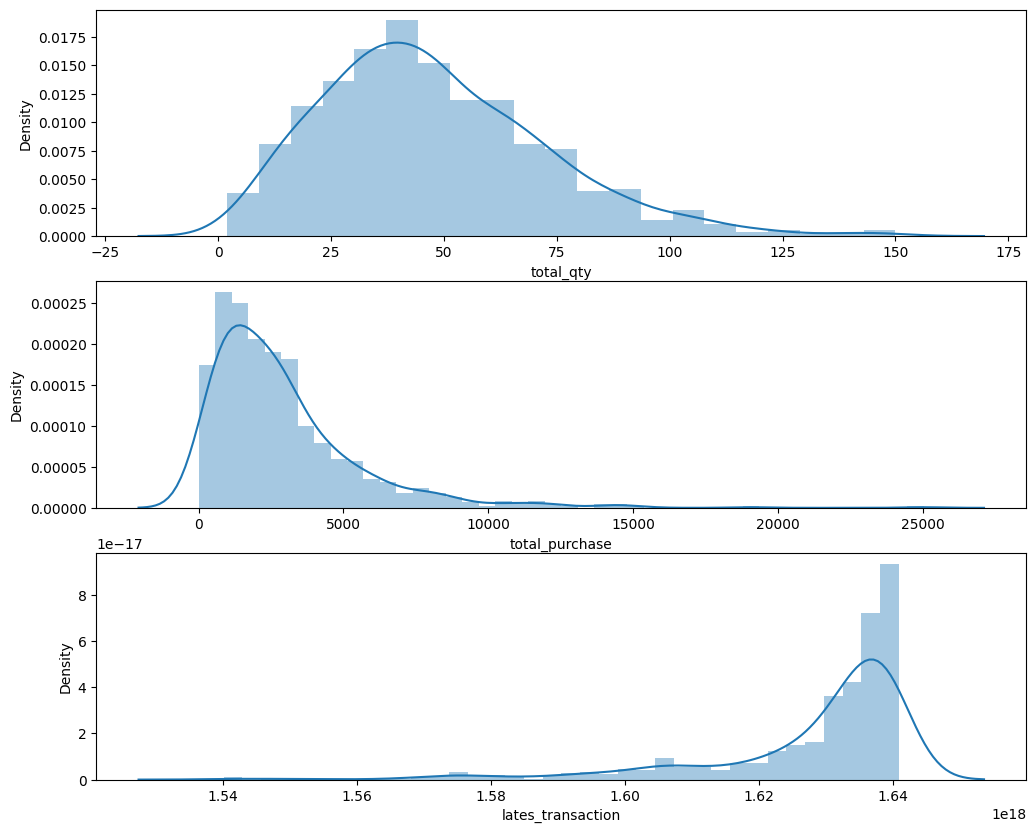

In [47]:
plt.figure(figsize=(12,10))

# Plot distribution

plt.subplot(3, 1, 1); sns.distplot(df_1['total_qty'])
plt.subplot(3, 1, 2); sns.distplot(df_1['total_purchase'])
plt.subplot(3, 1, 3); sns.distplot(df_1['lates_transaction'])

plt.show()

## Hasil Analisa Density

1. Total Quantity Transaksi harian mendekati normal
2. Total Purchase ini memiliki kecenderungan positif skewness (menandakan nilai ekstem lebih rendah dari nilai pusat)
3. Lates Transaction memiliki kenderungan negatif

In [48]:
# memilih dataset untuk pemodela berdasarja sub category

df_binder = df[df['Sub-Category'] == 'Binders']

In [49]:
## Mengurutkan Index pada dataset binders

df_binder['Order Date'].min(), df_binder['Order Date'].min()

(Timestamp('2018-01-04 00:00:00'), Timestamp('2018-01-04 00:00:00'))

In [50]:
## Setting Index
df_binder = df_binder.groupby('Order Date')['Quantity'].sum().reset_index()

df_binder

,Order Date,Quantity
0,2018-01-04,2
1,2018-01-06,2
2,2018-01-07,7
3,2018-01-13,5
4,2018-01-16,2
...,...,...
771,2021-12-25,22
772,2021-12-26,2
773,2021-12-28,19
774,2021-12-29,1


## Pemodelan Data

In [51]:
# To install the library
!pip install pmdarima
!pip install mypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
!pip3 install numpy scipy patsy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!pip3 install git+https://github.com/statsmodels/statsmodels.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-zk0gh871
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-zk0gh871
  Resolved https://github.com/statsmodels/statsmodels.git to commit 77cb066320391ffed4196a32491ddca28e8c9122
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [54]:
# Mempersiapka data untuk dilakukan decompose
# diperlukan untuk mengetahui pola trend atau sesional data
from statsmodels.tsa.seasonal import seasonal_decompose

In [55]:
# Setting index pada df Binder untuk decompose

# setting index pada df binder dekomposisi
df_binder = df_binder.set_index('Order Date')
df_binder.index

DatetimeIndex(['2018-01-04', '2018-01-06', '2018-01-07', '2018-01-13',
               '2018-01-16', '2018-01-19', '2018-01-20', '2018-01-26',
               '2018-01-28', '2018-02-02',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-25', '2021-12-26', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=776, freq=None)

In [56]:
df_binder = df_binder['Quantity'].resample('MS').mean()

In [57]:
df_binder

Order Date
2018-01-01     4.666667
2018-02-01     4.111111
2018-03-01     7.909091
2018-04-01     5.642857
2018-05-01     6.571429
2018-06-01     5.000000
2018-07-01     7.428571
2018-08-01     6.733333
2018-09-01     6.473684
2018-10-01     4.250000
2018-11-01     8.263158
2018-12-01     6.888889
2019-01-01     3.600000
2019-02-01     5.142857
2019-03-01     4.818182
2019-04-01     5.642857
2019-05-01     4.066667
2019-06-01     7.357143
2019-07-01     6.812500
2019-08-01     4.705882
2019-09-01    10.150000
2019-10-01     7.333333
2019-11-01    10.952381
2019-12-01     9.687500
2020-01-01     4.800000
2020-02-01     5.833333
2020-03-01     6.000000
2020-04-01     6.294118
2020-05-01     6.421053
2020-06-01     7.066667
2020-07-01     6.312500
2020-08-01     8.235294
2020-09-01     9.040000
2020-10-01     8.333333
2020-11-01    11.904762
2020-12-01     9.148148
2021-01-01     8.500000
2021-02-01     4.000000
2021-03-01     8.095238
2021-04-01     7.736842
2021-05-01     6.900000
2021-

In [58]:
df_binder = df_binder.to_frame().reset_index()

In [59]:
df_binder = df_binder.rename(columns={0: 'Quantity'})
df_binder.index.name = 'Order Date'

df_binder.set_index('Order Date', inplace=True)

In [60]:
df_binder['Quantity']

Order Date
2018-01-01     4.666667
2018-02-01     4.111111
2018-03-01     7.909091
2018-04-01     5.642857
2018-05-01     6.571429
2018-06-01     5.000000
2018-07-01     7.428571
2018-08-01     6.733333
2018-09-01     6.473684
2018-10-01     4.250000
2018-11-01     8.263158
2018-12-01     6.888889
2019-01-01     3.600000
2019-02-01     5.142857
2019-03-01     4.818182
2019-04-01     5.642857
2019-05-01     4.066667
2019-06-01     7.357143
2019-07-01     6.812500
2019-08-01     4.705882
2019-09-01    10.150000
2019-10-01     7.333333
2019-11-01    10.952381
2019-12-01     9.687500
2020-01-01     4.800000
2020-02-01     5.833333
2020-03-01     6.000000
2020-04-01     6.294118
2020-05-01     6.421053
2020-06-01     7.066667
2020-07-01     6.312500
2020-08-01     8.235294
2020-09-01     9.040000
2020-10-01     8.333333
2020-11-01    11.904762
2020-12-01     9.148148
2021-01-01     8.500000
2021-02-01     4.000000
2021-03-01     8.095238
2021-04-01     7.736842
2021-05-01     6.900000
2021-

In [61]:
df_binder.sort_index(inplace=True)
df_binder.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [62]:
result = seasonal_decompose(df_binder['Quantity'], model = 'multiplicative')

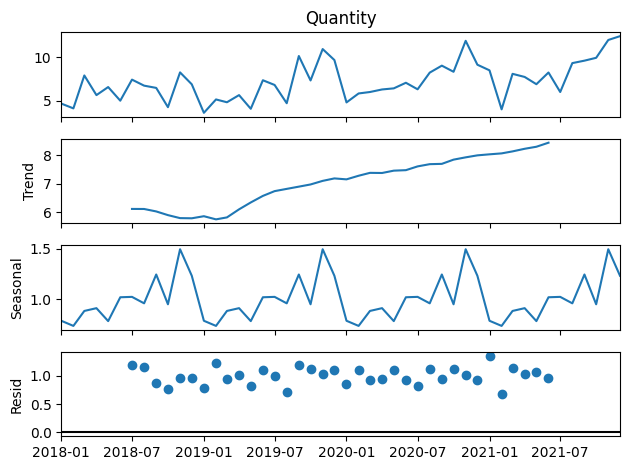

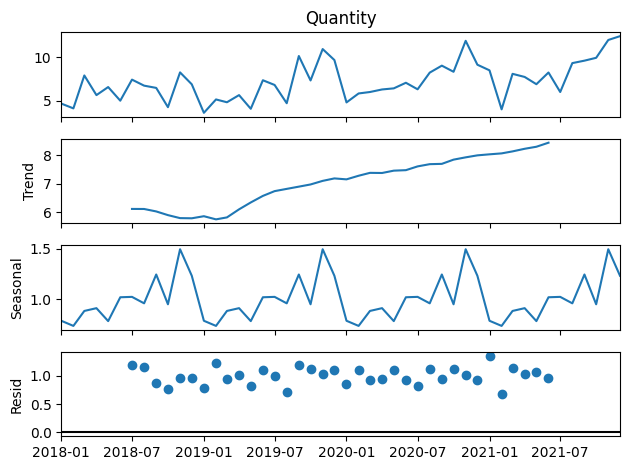

In [63]:
result.plot()

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [71]:
# Split Data Training dan Testing

train = df_binder.iloc[:len(df_binder)-12]
test = df_binder.iloc[:len(df_binder)-24] # data test adalah data satu tahun

In [72]:
# Membangun Model Sarimax

# order --> p,d,q nilai p adalah == 
model_sm = SARIMAX(df_binder['Quantity'],
                   order=(1,0,0),
                   seasonal_order=(2,1,0,12)
                   )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
result_model1 = model_sm.fit()
result_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Quantity   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                 -74.288
Date:                            Wed, 24 May 2023   AIC                            156.576
Time:                                    04:48:06   BIC                            162.910
Sample:                                01-01-2018   HQIC                           158.787
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0646      0.178      0.364      0.716      -0.283       0.413
ar.S.L12      -0.1351      0.297     -0.455      0.649      -0.717       0.447
ar.S.L24       0.0214      0.295      0.073      0.942      -0.557       0.600
sigma2         3.6053      1.075      3.355      0.001       1.499       5.712
===================================================================================
Ljung-Box (L1) (Q):                   2.32   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.13   Prob(JB):                         0.70
Heteroskedasticity (H):               0.69   Skew:                            -0.26
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
start = len(train)
end = len(train) + len(test)-1

# Prediksi 1 tahun
pred_1 = result_model1.predict(start, end, type='levels').rename('prediction_1')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Order Date'>

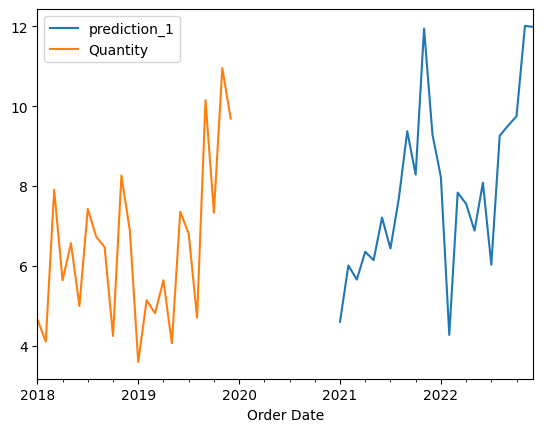

In [75]:
# Plot prediksi vs Aktual/Asli

pred_1.plot(legend=True)
test['Quantity'].plot(legend=True)

In [80]:
# Load tools evaluasi 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse

# Menghitung root mean squared error
rmse(test['Quantity'], pred_1)

2.394408445437468

In [82]:
# Menghitung MAPE 
mean_absolute_percentage_error(test['Quantity'], pred_1)

0.3700534018710137

In [76]:
# Forecast untuk 3 tahun kedepan
forecast = result_model1.predict(start = len(df_binder), 
                          end = (len(df_binder)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [77]:
forecast

2022-01-01     8.230102
2022-02-01     4.275624
2022-03-01     7.838410
2022-04-01     7.555983
2022-05-01     6.885769
2022-06-01     8.083939
2022-07-01     6.031494
2022-08-01     9.260659
2022-09-01     9.513877
2022-10-01     9.748260
2022-11-01    12.007547
2022-12-01    11.983803
2023-01-01     8.345854
2023-02-01     4.199103
2023-03-01     7.918005
2023-04-01     7.611332
2023-05-01     6.897956
2023-06-01     8.131730
2023-07-01     6.020543
2023-08-01     9.294008
2023-09-01     9.539919
2023-10-01     9.809287
2023-11-01    12.008569
2023-12-01    12.115972
2024-01-01     8.324435
2024-02-01     4.215346
2024-03-01     7.901750
2024-04-01     7.599979
2024-05-01     6.896005
2024-06-01     8.121716
2024-07-01     6.022697
2024-08-01     9.287946
2024-09-01     9.534226
2024-10-01     9.796840
2024-11-01    12.008592
2024-12-01    12.088343
Freq: MS, Name: Forecast, dtype: float64

In [78]:
from google.colab import files

forecast.to_excel('hasil_forecast_binder.xlsx')
files.download('hasil_forecast_binder.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>